# Ejercicio: Churn


Este ejercicio tiene por objetivo poner en práctica los conceptos las técnicas de aprendizaje supervisado y en particular clasificación. El ejercicio se divide en las siguientes secciones:
1. exploración de los datos mediante técnicas estadísticas clásicas,
2. selección de atributos,
3. entrenamiento de diferentes clasificadores,
4. evaluación.

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

# Librerías:
Importamos todas las librerías que serán utilizadas para el ejercicio.




In [ ]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U --no-cache-dir gdown --pre

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


# Datos:
Descargamos los datos desde google drive a la instancia de google colab.

In [ ]:
#!gdown --id 1OkojZM7dmynsC9rTZNpg7nnpQkYGvHlQbkJO7DB3asA
!gdown --id 1_kZWTS1shXWq3HHH1mebYcebwRD6_F_o

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_kZWTS1shXWq3HHH1mebYcebwRD6_F_o
To: /content/Bank Customer Churn Prediction.csv
100% 562k/562k [00:00<00:00, 6.73MB/s]


In [ ]:
# Ref.: https://www.kaggle.com/isaikumar/creditcardfraud/version/1
# Data frame with credit card data

# Leemos el archivo CSV
df = pd.read_csv( 'Bank Customer Churn Prediction.csv' )

# 1. Entendimiento del problemas y los datos.


## 1.1 El problema
*Describa con sus palabras el problema a resolver, defina las métricas de performance adecuadas al caso.*



## 1.2 Los datos
*Haga un análisis de los atributos y los datos. En el caso de los atributos observe el tipo de dato, distribuciones, etc. Analice la distribución de los datos en función de la clase objetivo (churn). Calidad de datos (datos faltantes, outliers).*

## Código de referencia

1.   Visualizamos la información del dataframe de datos.
2.   Calculamos la correlación entre cada una de las variables y la clase. Cuanto más grande el valor de correlación en valor absoluto mayor es la correlación estadística entre la variable y la clase Class que contiene si la transacción es fraudulenta o legítima.


In [ ]:
# 1
# Details on data
print(df.shape)
print(df.columns)
print(df.dtypes)

# Change categorical features to numerical
df['country'] = df['country'].apply(lambda x : 0.0 if x == 'France' else 1.0 if x == 'Germany' else 2.0)
df['gender'] = df['gender'].apply(lambda x : 0.0 if x == 'Male' else 1.0)

# 2
# Compute correlation of features with respect to Class
# By default uses Pearson correlation that estimates linear correlation:
# +1 or -1 linearly correlated, 0 non linear correlated
df.corr()["churn"].sort_values(key=abs,ascending=False)

(10000, 12)
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
customer_id           int64
credit_score          int64
country             float64
gender              float64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


churn               1.000000
age                 0.285323
active_member      -0.156128
balance             0.118533
products_number    -0.047820
credit_score       -0.027094
tenure             -0.014001
estimated_salary    0.012097
credit_card        -0.007138
customer_id        -0.006248
country                  NaN
gender                   NaN
Name: churn, dtype: float64

<Axes: xlabel='active_member', ylabel='Count'>

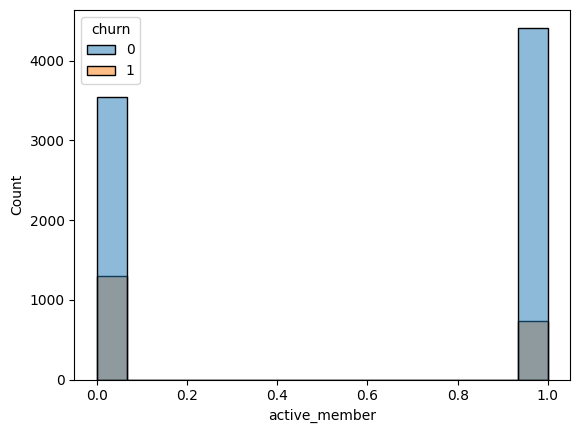

In [ ]:
import seaborn as sns

# Histogram of feature depending on churn
sns.histplot(data=df, x="age", hue="churn")

# 2. Modelado


## 2.1 Selección de atributos
Seleccionamos los atributos (características) a ser utilizadas. Dentro de los atributos $X$ no debe estar la clase $Churn$. *Comente la estrategia a serguir para seleccionar los atributos*.



In [ ]:
# 1
# Extract features and labels

#
# Obs. Modify the following code to select set of features
#
# The following line allows to select some variables to be used

# Remove columns from dataframe
df_X = df.drop(columns=['customer_id', 'churn'])
X = df_X.values

# Churn is the target to predict (classify)
y = df.churn

# 2
# Number of samples per class
unique, counts = np.unique(y, return_counts=True)
for i in range(0,len(unique)):
  print('Class %i: Samples %i' % (unique[i], counts[i]) )

# Number of attributes
print('Number of attributes: %i' % (X.shape)[1])

Class 0: Samples 7963
Class 1: Samples 2037
Number of attributes: 10


## 2.1 Entrenamiento del clasificador

1. El conjunto de datos se separa en entrenamiento y test.
2. Se selecciona y entrena un clasificador.
3. Métricas de performance



In [ ]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1
# Split train and test
# stratify=y means the same % of classes is present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# 2
#
# Selection of classifier
#
clf = DecisionTreeClassifier(min_samples_leaf=50)

# Train classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

# 3. Evaluación

## 3.1 Matriz de confusión

In [ ]:
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[2274  115]
 [ 363  248]]

 % Corr ----------------------------
84.06666666666666

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8623435722411832, 'recall': 0.9518627040602763, 'f1-score': 0.9048945483485873, 'support': 2389}: 
Class 1 (Churn) {'precision': 0.6831955922865014, 'recall': 0.40589198036006546, 'f1-score': 0.509240246406571, 'support': 611}: 


## 3.2 Scores de churn

(3000, 2)


363

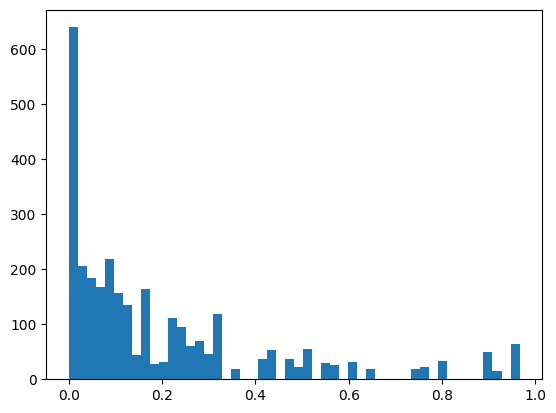

In [ ]:
prob = clf.predict_proba(X_test)
print(prob.shape)

plt.hist(prob[:,1], bins=50, cumulative=False)

# Number of customers with prob of churn more thatn 0.3
sum(prob[:,1]>0.5)